In [1]:
# 必要なライブラリを読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#写経【１】
# irisデータセットの読み込み
# 品種: SetosaとVersicolour（線形分離可能）
# 変数: petal lengthとpetal width
from sklearn.datasets import load_iris
iris = load_iris()
X_1 = iris.data[:100,[2,3]]
y_1 = iris.target[:100]

In [3]:
#写経【２】
# データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_1)
X_1_std = scaler.transform(X_1)

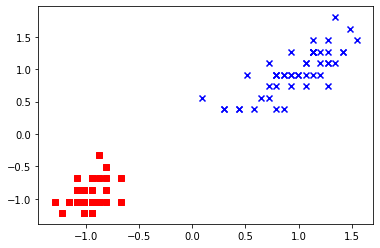

In [4]:
#写経【３】
# 散布図を出力
plt.scatter(X_1_std[:50, [0]], X_1_std[:50, [1]], color='red', marker='s')
plt.scatter(X_1_std[50:100, [0]], X_1_std[50:100, [1]], color='blue', marker='x')
plt.show()

In [5]:
#写経【４】
# ホールド・アウト法による分割
from sklearn.model_selection import train_test_split
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1_std, y_1, test_size=0.3, random_state=0)

In [6]:
#写経【５】
# 線形SVCの学習
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_1_train, y_1_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [7]:
# ２次元データの決定曲線をプロットする関数
def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max() +1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)
    plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


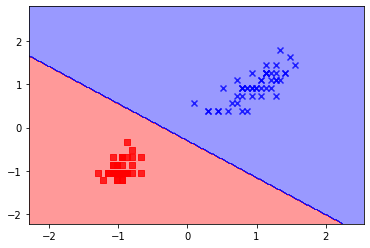

In [8]:
#写経【６】
# 決定曲線をプロットする関数
plot_decision_regions(X_1_std, y_1, svc)

In [9]:
#写経【７】
# 正答率を出力
svc.score(X_1_test, y_1_test)

1.0

In [10]:
#写経【８】
# irisデータセットの読み込み
# 品種: VersicolourとVirsiniga（線形分離不可能①）
# 変数: petal lengthとpetal width
from sklearn.datasets import load_iris
iris = load_iris()
X_2 = iris.data[50:150,[2,3]]
y_2 = iris.target[50:150]

In [11]:
#写経【９】
# データの標準化
from sklearn.preprocessing import StandardScaler
scaler_2 = StandardScaler()
scaler_2.fit(X_2)
X_2_std = scaler.transform(X_2)

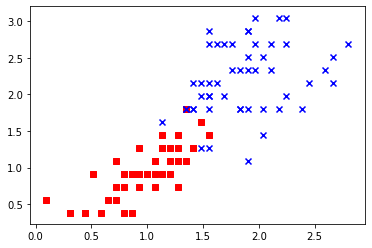

In [12]:
#写経【１０】
# 散布図を出力
plt.scatter(X_2_std[:50, [0]], X_2_std[:50, [1]], color='red', marker='s')
plt.scatter(X_2_std[50:100, [0]], X_2_std[50:100, [1]], color='blue', marker='x')
plt.show()

In [13]:
#写経【１１】
# ホールド・アウト法による分割
from sklearn.model_selection import train_test_split
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2_std, y_2, test_size=0.3, random_state=0)

In [14]:
#写経【１２】
# 線形SVCの学習
from sklearn.svm import SVC
svc_slack = SVC(kernel='linear', C=1.0)
svc_slack.fit(X_2_train, y_2_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


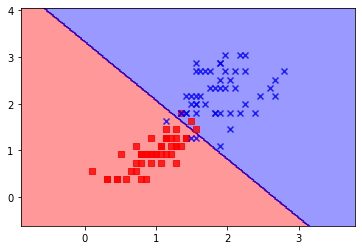

In [15]:
#写経【１３】
# 決定境界の出力
plot_decision_regions(X_2_std, y_2, svc_slack)

In [16]:
#写経【１４】
# 正答率を出力
svc_slack.score(X_2_test, y_2_test)

0.9666666666666667

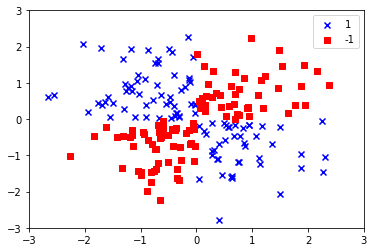

In [17]:
# XORのデータの作成
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

# データのプロット
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best') # 右上に凡例を出力
plt.show()

In [18]:
#写経【１５】
# ホールド・アウト法による分割
from sklearn.model_selection import train_test_split
X_xor_train, X_xor_test, y_xor_train, y_xor_test = train_test_split(X_xor, y_xor, test_size=0.3, random_state=0)

In [19]:
#写経【１６】
# 線形SVMによる学習
linear_svm = SVC(kernel='linear', C=0.1)
linear_svm.fit(X_xor_train, y_xor_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


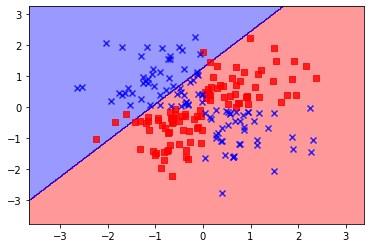

In [20]:
#写経【１７】
# 決定曲線のプロット
plot_decision_regions(X_xor, y_xor, classifier=linear_svm)

In [21]:
#写経【１８】
# 正答率を出力
linear_svm.score(X_xor_test, y_xor_test)

0.6166666666666667

In [22]:
#写経【１９】
# カーネルSVMによる学習
# C: 誤分類への厳しさ
# gamma: 決定曲線の複雑さ
rbf_svm = SVC(kernel='rbf', gamma=0.1, C=10)
rbf_svm.fit(X_xor_train, y_xor_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


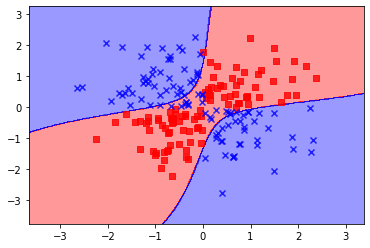

In [23]:
#写経【２０】
# 決定曲線のプロット
plot_decision_regions(X_xor, y_xor, classifier=rbf_svm)

In [24]:
#写経【２１】
# 正答率を出力
rbf_svm.score(X_xor_test, y_xor_test)

0.9